In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os


In [42]:
img = image.load_img('train/Pisang Matang/1681405651.jpg')

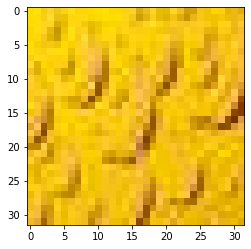

In [43]:
plt.imshow(img)

In [45]:
cv2.imread('train/Pisang Matang/1681405651.jpg').shape

(32, 32, 3)

In [5]:
train = ImageDataGenerator(rescale=1/255) 
valid = ImageDataGenerator(rescale=1/255)

In [47]:
train_dataset = train.flow_from_directory('train/',target_size=(32,32),
                                          batch_size=3,
                                          class_mode='binary')
valid_dataset = valid.flow_from_directory('valid/',target_size=(32,32),
                                          batch_size=3,
                                          class_mode='binary')

Found 696 images belonging to 3 classes.
Found 35 images belonging to 3 classes.


In [48]:
train_dataset.class_indices

{'Pisang Matang': 0, 'Pisang Mentah': 1, 'Pisang SetMatang': 2}

In [49]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [50]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [51]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Conv2D, MaxPooling2D, ZeroPadding2D, Flatten
from keras.preprocessing.image import ImageDataGenerator

In [63]:
# model = models.Sequential()
# model.add(layers.Conv2D(16,(3,3),activation='relu',input_shape=(32,32,3)))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(32,(3,3),activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(64,(3,3),activation='relu'))
# model.add(layers.Flatten())
# model.add(layers.Dense(512,activation='relu'))
# model.add(layers.Dense(3,activation='softmax'))

In [64]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(32,32,3)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(3,activation='softmax'))

In [68]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [69]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 4, 4, 64)          18496     
                                                                 
 flatten_5 (Flatten)         (None, 1024)             

In [67]:
model_fit = model.fit(train_dataset,
                      #steps_per_epoch=3,
                      epochs = 10,
                      validation_data = valid_dataset,
                      validation_steps = 10)

Epoch 1/10


ValueError: in user code:

    File "/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/keras/engine/training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/keras/engine/training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/keras/engine/training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/keras/engine/training.py", line 809, in train_step
        loss = self.compiled_loss(
    File "/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/keras/losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/keras/losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/keras/losses.py", line 1664, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/keras/backend.py", line 4994, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 3) are incompatible
